In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

In [58]:
#Setting working directory, dataset is imported from file generated in semantic analysis code
%cd C:\Users\Saman\Documents
scotch=pd.read_csv("cleanwhiskeydata.csv")
scotch = scotch.rename(columns=({'Custom field (Unnamed: 0)':'Custom field (Unnamed)'}))
scotch

C:\Users\Saman\Documents


,Unnamed,name,category,review.point,price,currency,description,description_clean,neg,neu,pos,compound,nb_chars,nb_words,count_exc,Polarity
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels,",magnificently powerful intense caramel dry pea...,0.000,0.679,0.321,0.9674,456,66,0,0.195671
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500,$,What impresses me most is how this whisky evol...,impress evolve incredibly complex nose palate ...,0.000,0.852,0.148,0.7783,495,82,1,-0.062037
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,$,There have been some legendary Bowmores from t...,legendary bowmores every bit equal share remar...,0.079,0.752,0.169,0.7003,503,84,0,0.337917
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...,name inspire buster keaton movie bottle produc...,0.110,0.676,0.214,0.6914,440,77,0,0.239583
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin...",captivate entice wonderfully charm first blend...,0.000,0.741,0.259,0.9552,528,71,0,0.263542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2243,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125,$,"Its best attributes are vanilla, toasted cocon...",best attribute vanilla toast coconut tropical ...,0.119,0.674,0.206,0.6705,443,76,0,0.104545
2243,2244,Distillery Select 'Craiglodge' (distilled at L...,Single Malt Scotch,71,60,$,"Aged in a sherry cask, which adds sweet notes ...",age sherry cask add sweet note toffee caribbea...,0.000,0.917,0.083,0.4588,326,56,0,0.051786
2244,2245,"Edradour Barolo Finish, 11 year old, 57.1%",Single Malt Scotch,70,80,$,"Earthy, fleshy notes with brooding grape notes...",earthy fleshy note brood grape note gamey fini...,0.000,0.669,0.331,0.8555,252,43,0,0.266667
2245,2246,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225,$,"The sherry is very dominant and cloying, which...",sherry dominant cloy unfortunate i’m crazy qua...,0.216,0.597,0.187,-0.0276,345,60,0,0.014286


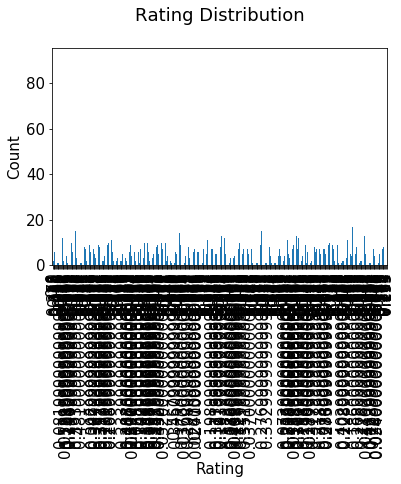

In [60]:
#checking distribution of positive rating
plt.rc("font", size=15)
scotch.pos.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [35]:
#Model 1 - recommendation on the basis of maximum positive review counts
pos_count = pd.DataFrame(scotch.groupby('name')['pos'].count())
pos_count.sort_values('pos', ascending=False).head()

,pos
name,
"Longmorn 16 year old, 48%",3
"Inchmurrin 18 year old, 46%",3
"Compass Box The Peat Monster, 46%",2
"Glen Moray Elgin Classic, 40%",2
"Bowmore, 18 year old, 43%",2


In [36]:
pos_count = pd.DataFrame(scotch.groupby('category')['pos'].count())
pos_count.sort_values('pos', ascending=False).head()

,pos
category,
Single Malt Scotch,1819
Blended Scotch Whisky,211
Blended Malt Scotch Whisky,132
Single Grain Whisky,57
Grain Scotch Whisky,28


In [7]:
avg_pos = pd.DataFrame(scotch.groupby('category')['pos'].mean())
avg_pos['posCount'] = pd.DataFrame(scotch.groupby('category')['pos'].count())
avg_pos.sort_values('posCount', ascending=False).head()

,pos,posCount
category,,
Single Malt Scotch,0.192488,1819
Blended Scotch Whisky,0.202801,211
Blended Malt Scotch Whisky,0.200280,132
Single Grain Whisky,0.200789,57
Grain Scotch Whisky,0.192714,28


In [8]:
avg_pos = pd.DataFrame(scotch.groupby('name')['pos'].mean())
avg_pos['posCount'] = pd.DataFrame(scotch.groupby('name')['pos'].count())
avg_pos.sort_values('posCount', ascending=False).head()

,pos,posCount
name,,
"Longmorn 16 year old, 48%",0.214667,3
"Inchmurrin 18 year old, 46%",0.156667,3
"Compass Box The Peat Monster, 46%",0.189000,2
"Glen Moray Elgin Classic, 40%",0.072500,2
"Bowmore, 18 year old, 43%",0.304000,2


In [37]:
#Constructing pivot table
scotch_pivot = scotch.pivot(index='Unnamed', columns='name', values= 'pos')
scotch_pivot = scotch_pivot.fillna(0)
scotch_pivot

name,"Big Peat Christmas Edition 2017, 54.1%","Dewar’s White Label, 40%","Exclusive Malts 2002 (distilled at Miltonduff) 14 year old, 54.1%","GlenDronach Cask Strength (batch 5), 55.3%","J. Mossman Platinum Crown 15 year old, 40%","Lagavulin 12 year old (Diageo Special Releases 2017), 56.5%","Port Askaig 110° Proof, 55%","Teaninich 17 year old (Diageo Special Releases 2017), 55.9%","That Boutique-y Whisky Company Blended Whisky No.1 50 year old, 46.6%","A. D. Rattray (distilled at Bowmore), 18 year old (Cask #2075), 53.5%",...,"William Grant’s 18 year old Rare, 40%","William Grant’s 25 year old, 40%","Wolfburn Single Malt, 46%","Wolfburn The Kylver Series, 46%","anCnoc 2002, 46%","anCnoc 35 year old Second Release, 41%","anCnoc Cutter, 46%","anCnoc Flaughter, 46%","anCnoc Rutter, 46%","“Double Malt” Speyside (Second Edition), 46%"
Unnamed,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#recommendation using collaborative filtering
def standardize(row):
    new_row = (row - row.mean())/(row.max()-row.min())
    return new_row

ratings_std = scotch_pivot.apply(standardize)
ratings_std = ratings_std.fillna(0)
ratings_std

name,"Big Peat Christmas Edition 2017, 54.1%","Dewar’s White Label, 40%","Exclusive Malts 2002 (distilled at Miltonduff) 14 year old, 54.1%","GlenDronach Cask Strength (batch 5), 55.3%","J. Mossman Platinum Crown 15 year old, 40%","Lagavulin 12 year old (Diageo Special Releases 2017), 56.5%","Port Askaig 110° Proof, 55%","Teaninich 17 year old (Diageo Special Releases 2017), 55.9%","That Boutique-y Whisky Company Blended Whisky No.1 50 year old, 46.6%","A. D. Rattray (distilled at Bowmore), 18 year old (Cask #2075), 53.5%",...,"William Grant’s 18 year old Rare, 40%","William Grant’s 25 year old, 40%","Wolfburn Single Malt, 46%","Wolfburn The Kylver Series, 46%","anCnoc 2002, 46%","anCnoc 35 year old Second Release, 41%","anCnoc Cutter, 46%","anCnoc Flaughter, 46%","anCnoc Rutter, 46%","“Double Malt” Speyside (Second Edition), 46%"
Unnamed,,,,,,,,,,,,,,,,,,,,,
1,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
2,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
3,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
4,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
5,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
2244,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
2245,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445


In [39]:
#Step 1: transpose the user-item matrix to the item-user matrix
#The item-user matrix shown in Table , transposed from the corresponding user-item matrix, makes it more clear by viewing each row as an item vector during the similarity calculation.

item_similarity = cosine_similarity(ratings_std.T)
print(item_similarity)


[[ 1.00000000e+00 -4.45235975e-04 -4.45235975e-04 ... -4.45235975e-04
   0.00000000e+00 -4.45235975e-04]
 [-4.45235975e-04  1.00000000e+00 -4.45235975e-04 ... -4.45235975e-04
   0.00000000e+00 -4.45235975e-04]
 [-4.45235975e-04 -4.45235975e-04  1.00000000e+00 ... -4.45235975e-04
   0.00000000e+00 -4.45235975e-04]
 ...
 [-4.45235975e-04 -4.45235975e-04 -4.45235975e-04 ...  1.00000000e+00
   0.00000000e+00 -4.45235975e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.45235975e-04 -4.45235975e-04 -4.45235975e-04 ... -4.45235975e-04
   0.00000000e+00  1.00000000e+00]]


In [40]:
similarity_dataframe = pd.DataFrame(item_similarity,index=scotch_pivot.columns,columns=scotch_pivot.columns)
similarity_dataframe

name,"Big Peat Christmas Edition 2017, 54.1%","Dewar’s White Label, 40%","Exclusive Malts 2002 (distilled at Miltonduff) 14 year old, 54.1%","GlenDronach Cask Strength (batch 5), 55.3%","J. Mossman Platinum Crown 15 year old, 40%","Lagavulin 12 year old (Diageo Special Releases 2017), 56.5%","Port Askaig 110° Proof, 55%","Teaninich 17 year old (Diageo Special Releases 2017), 55.9%","That Boutique-y Whisky Company Blended Whisky No.1 50 year old, 46.6%","A. D. Rattray (distilled at Bowmore), 18 year old (Cask #2075), 53.5%",...,"William Grant’s 18 year old Rare, 40%","William Grant’s 25 year old, 40%","Wolfburn Single Malt, 46%","Wolfburn The Kylver Series, 46%","anCnoc 2002, 46%","anCnoc 35 year old Second Release, 41%","anCnoc Cutter, 46%","anCnoc Flaughter, 46%","anCnoc Rutter, 46%","“Double Malt” Speyside (Second Edition), 46%"
name,,,,,,,,,,,,,,,,,,,,,
"Big Peat Christmas Edition 2017, 54.1%",1.000000,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
"Dewar’s White Label, 40%",-0.000445,1.000000,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
"Exclusive Malts 2002 (distilled at Miltonduff) 14 year old, 54.1%",-0.000445,-0.000445,1.000000,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
"GlenDronach Cask Strength (batch 5), 55.3%",-0.000445,-0.000445,-0.000445,1.000000,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
"J. Mossman Platinum Crown 15 year old, 40%",-0.000445,-0.000445,-0.000445,-0.000445,1.000000,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,-0.000445,0.0,-0.000445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"anCnoc 35 year old Second Release, 41%",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
"anCnoc Cutter, 46%",-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,1.000000,-0.000445,0.0,-0.000445
"anCnoc Flaughter, 46%",-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,...,-0.000445,-0.000445,-0.000445,-0.000445,-0.000445,0.0,-0.000445,1.000000,0.0,-0.000445


In [41]:
item_similarity_user = cosine_similarity(ratings_std)
print(item_similarity_user)

[[ 1.00000000e+00 -4.59307096e-04 -4.59307096e-04 ... -4.59307096e-04
  -4.59307096e-04 -4.59307096e-04]
 [-4.59307096e-04  1.00000000e+00 -4.59307096e-04 ... -4.59307096e-04
  -4.59307096e-04 -4.59307096e-04]
 [-4.59307096e-04 -4.59307096e-04  1.00000000e+00 ... -4.59307096e-04
  -4.59307096e-04 -4.59307096e-04]
 ...
 [-4.59307096e-04 -4.59307096e-04 -4.59307096e-04 ...  1.00000000e+00
  -4.59307096e-04 -4.59307096e-04]
 [-4.59307096e-04 -4.59307096e-04 -4.59307096e-04 ... -4.59307096e-04
   1.00000000e+00 -4.59307096e-04]
 [-4.59307096e-04 -4.59307096e-04 -4.59307096e-04 ... -4.59307096e-04
  -4.59307096e-04  1.00000000e+00]]


In [42]:
similarity_dataframe_user = pd.DataFrame(item_similarity_user,index=scotch_pivot.index,columns=scotch_pivot.index)
similarity_dataframe_user

Unnamed,1,2,3,4,5,6,7,8,9,10,...,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247
Unnamed,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,...,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459
2,-0.000459,1.000000,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,...,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459
3,-0.000459,-0.000459,1.000000,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,...,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459
4,-0.000459,-0.000459,-0.000459,1.000000,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,...,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459
5,-0.000459,-0.000459,-0.000459,-0.000459,1.000000,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,...,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,...,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,1.000000,-0.000459,-0.000459,-0.000459,-0.000459
2244,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,...,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,1.000000,-0.000459,-0.000459,-0.000459
2245,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,...,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,-0.000459,1.000000,-0.000459,-0.000459


In [43]:
## Let's Make Recommendations
def recommend_drinks(user_name,pos_rating):
    similar_score = similarity_dataframe_user[user_name]*(pos_rating)
    similar_score = similar_score.sort_values(ascending=False)
    
    return similar_score
 
print(recommend_drinks(7,0.01))

Unnamed
7       0.010000
1135   -0.000005
586    -0.000005
6      -0.000005
2087   -0.000005
          ...   
2121   -0.000011
683    -0.000011
492    -0.000011
2184   -0.000011
682    -0.000011
Name: 7, Length: 2247, dtype: float64


In [44]:
## Let's Make Recommendations

def recommend_drinks(scotch_name,pos_rating):
    similar_score = similarity_dataframe[scotch_name]*(pos_rating)
    similar_score = similar_score.sort_values(ascending=False)
    
    return similar_score

print(recommend_drinks("Black Bowmore, 1964 vintage, 42 year old, 40.5%" ,0.2))

name
Black Bowmore, 1964 vintage, 42 year old, 40.5%                                     0.200000
Signatory (distilled at Ben Nevis), Cask #7438, 31 year old, 1975 vintage, 58.4%    0.000000
Murray McDavid (distilled at Strathisla) 1976, 46%                                  0.000000
Bowmore, 16 year old, 1990 vintage, 53.8%                                           0.000000
Auchentoshan Virgin Oak, 46%                                                        0.000000
                                                                                      ...   
Bowmore, 18 year old, 43%                                                          -0.000126
Chapter 7 (undisclosed Highland distillery), 55.8%                                 -0.000126
Ledaig, 10 year old, 43%                                                           -0.000126
Inchmurrin 18 year old, 46%                                                        -0.000149
Longmorn 16 year old, 48%                                        

In [45]:
#Recommendation using correlation
whiskey_pivot = scotch.pivot(index='Unnamed', columns='name', values= 'pos')
whiskey_pivot



name,"Big Peat Christmas Edition 2017, 54.1%","Dewar’s White Label, 40%","Exclusive Malts 2002 (distilled at Miltonduff) 14 year old, 54.1%","GlenDronach Cask Strength (batch 5), 55.3%","J. Mossman Platinum Crown 15 year old, 40%","Lagavulin 12 year old (Diageo Special Releases 2017), 56.5%","Port Askaig 110° Proof, 55%","Teaninich 17 year old (Diageo Special Releases 2017), 55.9%","That Boutique-y Whisky Company Blended Whisky No.1 50 year old, 46.6%","A. D. Rattray (distilled at Bowmore), 18 year old (Cask #2075), 53.5%",...,"William Grant’s 18 year old Rare, 40%","William Grant’s 25 year old, 40%","Wolfburn Single Malt, 46%","Wolfburn The Kylver Series, 46%","anCnoc 2002, 46%","anCnoc 35 year old Second Release, 41%","anCnoc Cutter, 46%","anCnoc Flaughter, 46%","anCnoc Rutter, 46%","“Double Malt” Speyside (Second Edition), 46%"
Unnamed,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
drink_ratings = whiskey_pivot['Longmorn 16 year old, 48%']
drink_ratings

Unnamed
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
        ..
2243   NaN
2244   NaN
2245   NaN
2246   NaN
2247   NaN
Name: Longmorn 16 year old, 48%, Length: 2247, dtype: float64

In [47]:
similar_drinks = whiskey_pivot.corrwith(drink_ratings)
similar_drinks


name
 Big Peat Christmas Edition 2017, 54.1%                              NaN
 Dewar’s White Label, 40%                                            NaN
 Exclusive Malts 2002 (distilled at Miltonduff) 14 year old, 54.1%   NaN
 GlenDronach Cask Strength (batch 5), 55.3%                          NaN
 J. Mossman Platinum Crown 15 year old, 40%                          NaN
                                                                      ..
anCnoc 35 year old Second Release, 41%                               NaN
anCnoc Cutter, 46%                                                   NaN
anCnoc Flaughter, 46%                                                NaN
anCnoc Rutter, 46%                                                   NaN
“Double Malt” Speyside (Second Edition), 46%                         NaN
Length: 2223, dtype: float64

In [48]:
corr_drinks = pd.DataFrame(similar_drinks, columns=['pearsonR'])
corr_drinks


,pearsonR
name,
"Big Peat Christmas Edition 2017, 54.1%",NaN
"Dewar’s White Label, 40%",NaN
"Exclusive Malts 2002 (distilled at Miltonduff) 14 year old, 54.1%",NaN
"GlenDronach Cask Strength (batch 5), 55.3%",NaN
"J. Mossman Platinum Crown 15 year old, 40%",NaN
...,...
"anCnoc 35 year old Second Release, 41%",NaN
"anCnoc Cutter, 46%",NaN
"anCnoc Flaughter, 46%",NaN


In [49]:
corr_drinks = corr_drinks.fillna(0)
corr_drinks

,pearsonR
name,
"Big Peat Christmas Edition 2017, 54.1%",0.0
"Dewar’s White Label, 40%",0.0
"Exclusive Malts 2002 (distilled at Miltonduff) 14 year old, 54.1%",0.0
"GlenDronach Cask Strength (batch 5), 55.3%",0.0
"J. Mossman Platinum Crown 15 year old, 40%",0.0
...,...
"anCnoc 35 year old Second Release, 41%",0.0
"anCnoc Cutter, 46%",0.0
"anCnoc Flaughter, 46%",0.0


In [50]:
corr_summary = corr_drinks.join(avg_pos['pos'])
corr_summary

,pearsonR,pos
name,,
"Big Peat Christmas Edition 2017, 54.1%",0.0,0.192
"Dewar’s White Label, 40%",0.0,0.057
"Exclusive Malts 2002 (distilled at Miltonduff) 14 year old, 54.1%",0.0,0.105
"GlenDronach Cask Strength (batch 5), 55.3%",0.0,0.363
"J. Mossman Platinum Crown 15 year old, 40%",0.0,0.207
...,...,...
"anCnoc 35 year old Second Release, 41%",0.0,0.000
"anCnoc Cutter, 46%",0.0,0.104
"anCnoc Flaughter, 46%",0.0,0.091


In [23]:
corr_summary[corr_summary['pos']>=0.1].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,pos
name,,
"Longmorn 16 year old, 48%",1.0,0.214667
"Big Peat Christmas Edition 2017, 54.1%",0.0,0.192000
"Macallan Gold, 40%",0.0,0.291000
"Macallan Edition No.3, 48.3%",0.0,0.121000
"Macallan Edition No. 1, 48%",0.0,0.206000
"Macallan Easter Elchies, 52.3%",0.0,0.265000
"Macallan Diamond Jubilee, 52%",0.0,0.182000
"Macallan Coronation Cask Spanish Oak #190952, 55.7%",0.0,0.186000
"Macallan Classic Cut 2017 Edition, 58.4%",0.0,0.286000


In [51]:
# Model-4, Pearson's correlation
def pearson(s1,s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2)* np.sum(s2_c ** 2))

In [52]:
whiskey_pivot = whiskey_pivot.fillna(0)
pearson(whiskey_pivot['Longmorn 16 year old, 48%'], whiskey_pivot['Macallan Easter Elchies, 52.3%'] )

-0.0007534735798142557

In [53]:
def rec_corr(whiskey_name, whiskey_pivot, num_of_recs):

    reviews=[]
    for whiskey in whiskey_pivot.columns:
        if whiskey == whiskey_name:
            continue
        cor=pearson(whiskey_pivot[whiskey_name], whiskey_pivot[whiskey])
        if np.isnan(cor):
            continue
        else:
            reviews.append((whiskey,cor))
    reviews.sort(reverse=True)
    print (reviews[:num_of_recs])

In [54]:
recommendation_of_whiskey = rec_corr('Inchmurrin 18 year old, 46%',whiskey_pivot, 10)

C:\Users\Saman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


[('“Double Malt” Speyside (Second Edition), 46%', -0.0007442584631704549), ('anCnoc Flaughter, 46%', -0.0007442584631704553), ('anCnoc Cutter, 46%', -0.0007442584631704548), ('anCnoc 2002, 46%', -0.0007442584631704551), ('Wolfburn The Kylver Series, 46%', -0.0007442584631704547), ('Wolfburn Single Malt, 46%', -0.0007442584631704555), ('William Grant’s 25 year old, 40%', -0.0007442584631704544), ('William Grant’s 18 year old Rare, 40%', -0.0007442584631704547), ('William Grant Rare Cask Reserves Ghosted Reserve 21 year old, 42.8%', -0.000744258463170455), ('Wild Scotsman, 15 year old, 46%', -0.0007442584631704554)]
